# Ejemplo de clasificación mediante redes neuronales empleando `sklearn` y el conjunto de datos IRIS

## Carga de los datos

En primer lugar, cargaremos el conjunto de datos IRIS dataset (Más información en https://archive.ics.uci.edu/ml/datasets/iris). Éste se puede descargar de Internet o puede ser cargado directamente de la librería `scikit-learn`, que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y machine learning, o bién a través de la URL del conjunto de datos.

In [1]:
import pandas

dataframe = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
dataframe.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Interpretación del gráfico de violín de las características del Iris

El gráfico de violín muestra la distribución de las características del iris de la siguiente manera:

- **Eje X (Características)**: Representa las cuatro características del iris: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

- **Eje Y (Valor)**: Muestra los valores de las características. Cada valor en el eje y representa un rango de valores posibles para una característica específica.

- **Violines**: Cada violín representa la distribución de los valores para una característica específica del iris. La forma del violín muestra la densidad de los datos en diferentes rangos de valores. 

- **Puntos centrales**: Dentro de cada violín, hay un punto blanco que representa la mediana de los datos para esa característica.

- **Cuartiles**: Dentro de cada violín, hay líneas que muestran los cuartiles de los datos. La caja interior muestra el intervalo intercuartílico, que abarca desde el primer cuartil (25%) hasta el tercer cuartil (75%) de los datos.

Este gráfico es útil para comprender la distribución y dispersión de los valores de cada característica del iris, lo que puede ayudar a identificar patrones o diferencias significativas entre ellas.


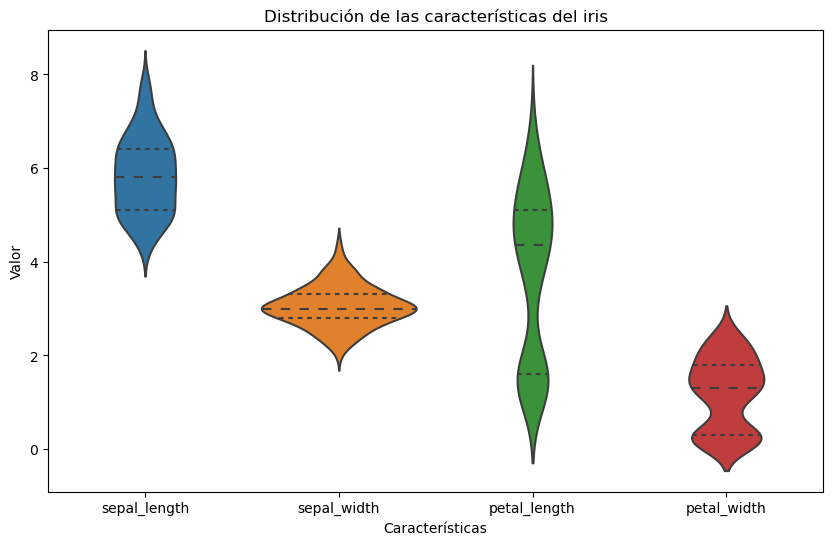

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
dataframe = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
dataframe.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Graficar
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataframe.drop(columns=["class"]), inner="quartile")
plt.title("Distribución de las características del iris")
plt.xlabel("Características")
plt.ylabel("Valor")
plt.show()

# Interpretación del diagrama de dispersión: Longitud del Sépalo vs. Ancho del Sépalo

El diagrama de dispersión muestra la relación entre la longitud y el ancho del sépalo de las flores de iris de la siguiente manera:

- **Eje X (Longitud del Sépalo)**: Representa la longitud del sépalo de las flores de iris. Cada punto en el eje x indica la longitud del sépalo de una flor de iris específica.

- **Eje Y (Ancho del Sépalo)**: Representa el ancho del sépalo de las flores de iris. Cada punto en el eje y indica el ancho del sépalo de una flor de iris específica.

- **Puntos (Datos)**: Cada punto en el diagrama de dispersión representa una flor de iris. La posición del punto en el diagrama indica la longitud y el ancho del sépalo de la flor.

- **Colores (Clase)**: Los puntos están coloreados según la clase de iris a la que pertenecen. Cada color representa una clase diferente de iris, como Setosa, Versicolor o Virginica.

Este gráfico permite visualizar la distribución de las longitudes y anchos del sépalo de las flores de iris, así como identificar cualquier patrón o agrupamiento en los datos. También puede ayudar a distinguir cómo se distribuyen las diferentes clases de iris en función de estas dos características.


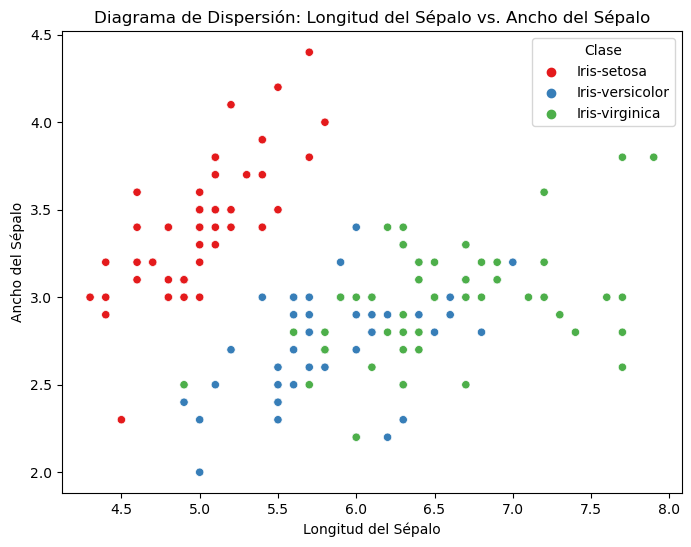

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="sepal_length", y="sepal_width", data=dataframe, hue="class", palette="Set1")
plt.title("Diagrama de Dispersión: Longitud del Sépalo vs. Ancho del Sépalo")
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.legend(title="Clase")
plt.show()


# Interpretación del diagrama de caja: Longitud del Sépalo por clase de Iris

El diagrama de caja muestra la distribución de las longitudes del sépalo para cada clase de iris de la siguiente manera:

- **Eje X (Clase de Iris)**: Representa las tres clases de iris: Setosa, Versicolor y Virginica. Cada caja en el diagrama corresponde a una clase específica de iris.

- **Eje Y (Longitud del Sépalo)**: Representa la longitud del sépalo de las flores de iris. La posición de la línea central dentro de cada caja indica la mediana de las longitudes del sépalo para la clase correspondiente.

- **Cajas (Distribución)**: Cada caja en el diagrama muestra la distribución de las longitudes del sépalo para una clase de iris específica. La parte inferior de la caja representa el primer cuartil (25%), la línea central representa la mediana, y la parte superior de la caja representa el tercer cuartil (75%).

- **Bigotes (Rango)**: Los bigotes en el diagrama muestran el rango de las longitudes del sépalo para cada clase de iris, excluyendo los valores atípicos.

- **Puntos (Valores Atípicos)**: Los puntos que están fuera de los bigotes representan valores atípicos, es decir, longitudes del sépalo que son significativamente diferentes de la mayoría de las observaciones en esa clase.

Este gráfico permite comparar visualmente las distribuciones de las longitudes del sépalo entre las diferentes clases de iris y detectar cualquier diferencia significativa en las longitudes del sépalo entre las clases.


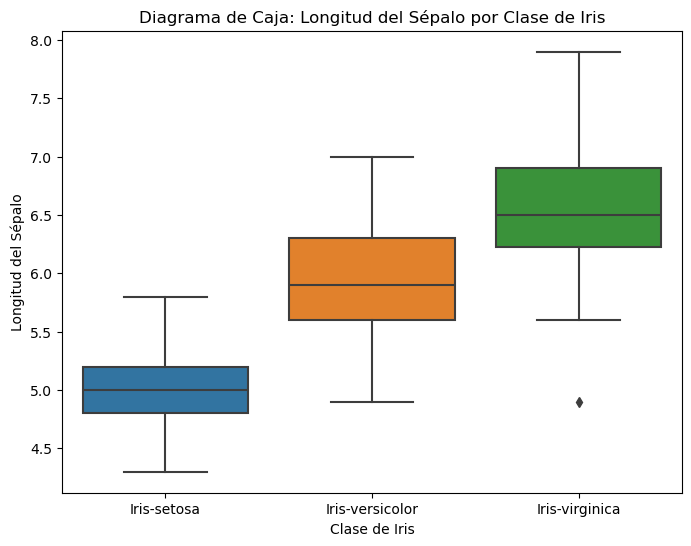

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y="sepal_length", data=dataframe)
plt.title("Diagrama de Caja: Longitud del Sépalo por Clase de Iris")
plt.xlabel("Clase de Iris")
plt.ylabel("Longitud del Sépalo")
plt.show()


# Interpretación del mapa de calor: Correlación entre características

El mapa de calor muestra la correlación entre las características del iris de la siguiente manera:

- **Eje X e Y (Características)**: Los ejes x e y representan las características del iris, incluyendo longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Cada celda en el mapa de calor corresponde a la correlación entre dos características.

- **Color de las Celdas (Correlación)**: El color de cada celda indica la fuerza y dirección de la correlación entre dos características. Los tonos más claros representan una correlación positiva, mientras que los tonos más oscuros representan una correlación negativa. Cuanto más intenso es el color, más fuerte es la correlación.

- **Valor Numérico (Coeficiente de Correlación)**: Dentro de cada celda, se muestra el valor numérico del coeficiente de correlación entre las dos características. Este valor oscila entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica no correlación y 1 indica una correlación positiva perfecta.

Este gráfico permite identificar rápidamente qué características están más correlacionadas entre sí y cuál es la dirección de esa correlación. Por ejemplo, si dos características tienen una alta correlación positiva, significa que tienden a aumentar juntas, mientras que una alta correlación negativa indica que tienden a moverse en direcciones opuestas.


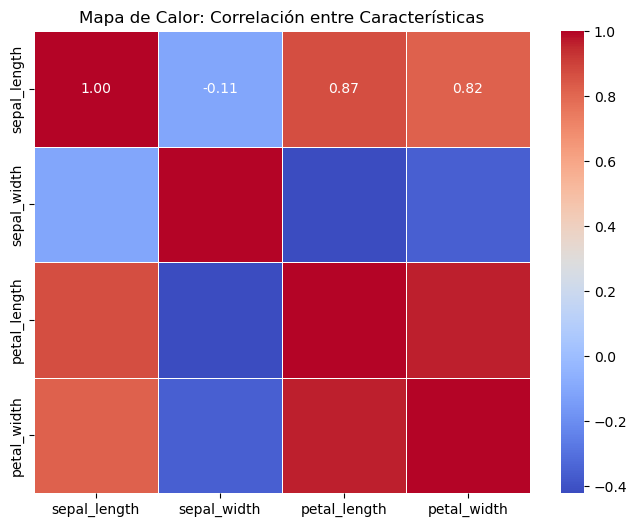

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe.drop(columns=["class"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor: Correlación entre Características")
plt.show()

# Interpretación del diagrama de pares

El diagrama de pares muestra todas las relaciones de dispersión bivariadas posibles entre las características del iris de la siguiente manera:

- **Cuadrícula de Subgráficos**: Cada subgráfico en la cuadrícula representa una combinación de dos características del iris. La diagonal de la cuadrícula muestra un histograma para cada característica.

- **Puntos de Datos**: Los puntos en cada subgráfico representan las observaciones individuales del conjunto de datos del iris. Cada punto está coloreado según la clase de iris a la que pertenece.

- **Línea de Regresión (Opcional)**: Opcionalmente, se puede incluir una línea de regresión que muestra la tendencia general de los datos en cada subgráfico.

- **Colores (Clase de Iris)**: Los puntos de datos están coloreados según la clase de iris a la que pertenecen. Cada color representa una clase diferente de iris, como Setosa, Versicolor o Virginica.

Este gráfico permite visualizar rápidamente las relaciones entre todas las combinaciones de características del iris y detectar cualquier patrón o correlación entre ellas. Es útil para explorar la estructura de los datos y entender cómo se relacionan las características entre sí.


C:\Users\Antonio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Antonio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Antonio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Antonio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

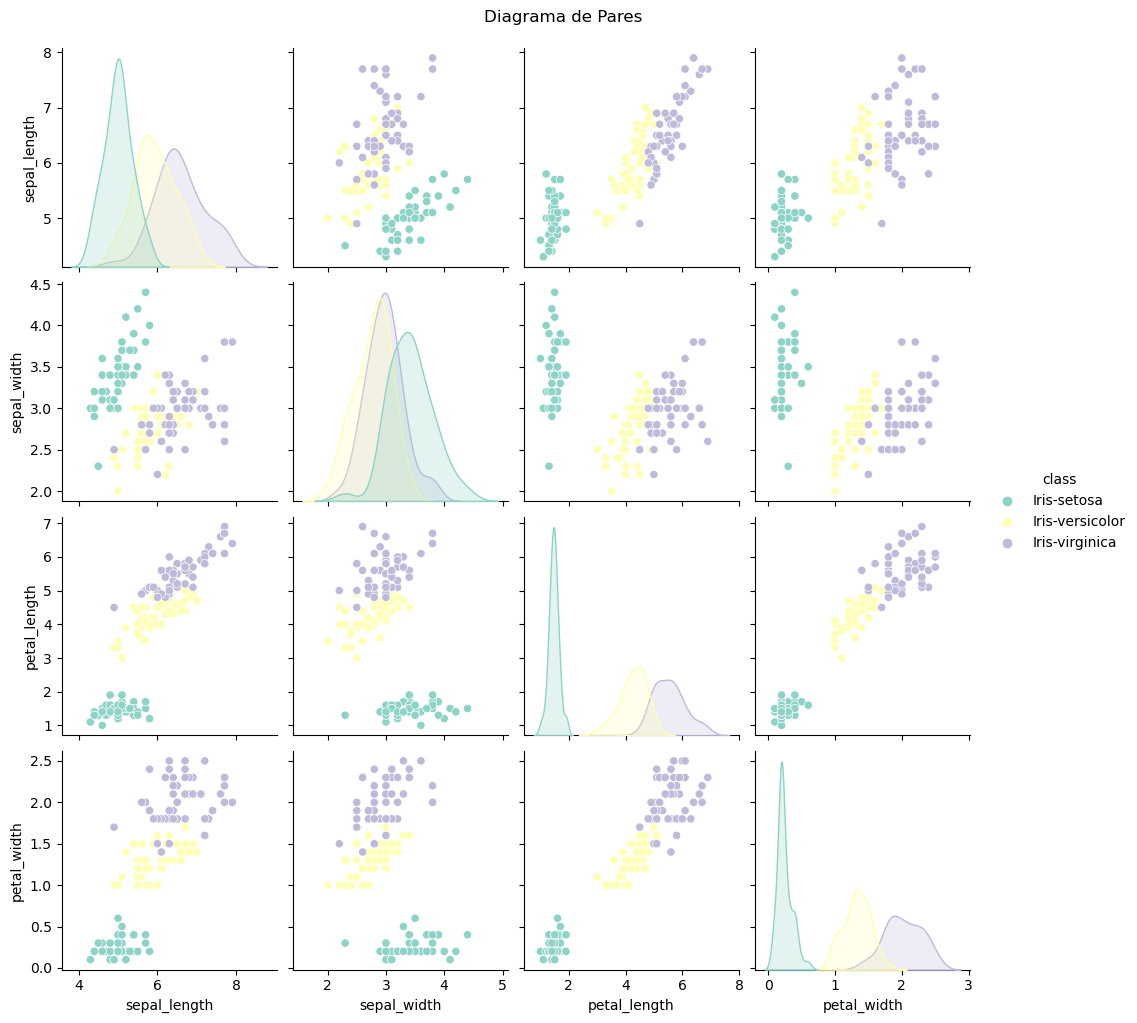

In [6]:
sns.pairplot(dataframe, hue="class", palette="Set3")
plt.suptitle("Diagrama de Pares", y=1.02)
plt.show()


Construimos la matriz `X` de variables independientes y el array `Y` de la variable a predecir.

In [7]:
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

## 2. Codificación de las etiquetas

A continuación, deberemos codificar las etiquetas de las clases para poder ser utilizadas en la red neuronal.

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
y = utils.to_categorical(encoded_Y)

## 3. Creación de los conjuntos de datos de entrenamiento y test

Geramos los conjuntos de entrenamiento y test mediante la librería `train_test_split`.

In [9]:
from sklearn.model_selection import train_test_split

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)

## 4. Entrenamiento del modelo

A continuación crearemos y entrenaremos el modelo utilizando los datos del conjunto de entrenamiento.

Crearemos una red neuronal empleando la librería `sklearn` y, en concreto, la clase `MLPClassifier`. La red consiste en una capa oculta con 10 neuronas.

In [10]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10,), random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=(10,), max_iter=1000, random_state=1,
              solver='lbfgs')

## 5. Validación del modelo

Aplicamos los datos de test para comprobar la precisión del modelo.

In [12]:
# Generar las predicciones en el conjunto de entrenamiento y prueba
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calcular los porcentajes de coincidencia entre las etiquetas verdaderas y las predicciones
train_accuracy = (y_train == y_train_pred).mean() * 100
test_accuracy = (y_test == y_test_pred).mean() * 100

# Imprimir los porcentajes de coincidencia
print("Porcentaje de coincidencia en el conjunto de entrenamiento:", train_accuracy, "%")
print("Porcentaje de coincidencia en el conjunto de prueba:", test_accuracy, "%")


Porcentaje de coincidencia en el conjunto de entrenamiento: 98.09523809523809 %
Porcentaje de coincidencia en el conjunto de prueba: 100.0 %
